# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


    



In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = base_url + "q=" + city + "&units=imperial" + "&appid=" + weather_api_key

weather_response = requests.get(query_url).json()     

    
print(json.dumps(weather_response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 87
    },
    "cod": 200,
    "coord": {
        "lat": -3.47,
        "lon": 102.53
    },
    "dt": 1594787331,
    "id": 1645875,
    "main": {
        "feels_like": 81.91,
        "grnd_level": 937,
        "humidity": 65,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 78.28,
        "temp_max": 78.28,
        "temp_min": 78.28
    },
    "name": "Curup",
    "sys": {
        "country": "ID",
        "sunrise": 1594768652,
        "sunset": 1594811624
    },
    "timezone": 25200,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 71,
        "speed": 3.36
    }
}


In [4]:
name=[]
city_cloud =[]
country_name=[]
date=[]
humidity=[]
lat=[]
long=[]
max_temp=[]
wind_speed=[]
counter=0
units = 'imperial'

for city in cities:
    try:
        query_url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}'
        weather_response = requests.get(query_url).json()     

        name.append(weather_response["name"])
        city_cloud.append(weather_response["clouds"]["all"])
        country_name.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        humidity.append(weather_response["main"]["humidity"])
        lat.append(weather_response["coord"]["lat"])
        long.append(weather_response["coord"]["lon"])
        max_temp.append(weather_response["main"]["temp_max"])
        wind_speed.append(weather_response["wind"]["speed"])
        city_name = weather_response["name"]
        counter=counter+1
        print(f"processing record:{counter}|{city_name}")
            
    except:
        print("city not found")
    continue

processing record:1|Karonga
processing record:2|Yellowknife
city not found
processing record:3|East London
processing record:4|Los Llanos de Aridane
processing record:5|Ushuaia
city not found
processing record:6|San Patricio
processing record:7|Örnsköldsvik
processing record:8|Kavieng
processing record:9|Avarua
processing record:10|Kendari
processing record:11|Harper
processing record:12|Okhotsk
processing record:13|Mackay
processing record:14|Yara
processing record:15|Busselton
city not found
processing record:16|Bintulu
processing record:17|Korla
processing record:18|Jamestown
processing record:19|Albany
processing record:20|Mildura
processing record:21|Provideniya
processing record:22|Punta Arenas
processing record:23|Nikolskoye
processing record:24|Henties Bay
processing record:25|Ambilobe
processing record:26|Hobart
processing record:27|Monteagudo
processing record:28|Castro
city not found
processing record:29|Kaitangata
processing record:30|Barrow
processing record:31|Saint-Phili

processing record:254|The Pas
processing record:255|Periyanayakkanpalaiyam
processing record:256|Cockburn Town
processing record:257|Norman Wells
processing record:258|Olinda
processing record:259|Klaksvík
processing record:260|Hurghada
city not found
processing record:261|Dhidhdhoo
processing record:262|Mar del Plata
processing record:263|Calama
processing record:264|Santa María del Oro
processing record:265|Karratha
city not found
processing record:266|Ponta do Sol
processing record:267|Lubango
processing record:268|Inowrocław
processing record:269|Hasaki
processing record:270|Yerbogachën
processing record:271|Shache
processing record:272|Umm Kaddadah
processing record:273|Ust'-Ishim
city not found
processing record:274|Mogadishu
processing record:275|Cherëmukhovo
processing record:276|Rocha
processing record:277|Morant Bay
processing record:278|Vernon
city not found
city not found
processing record:279|Dzaoudzi
processing record:280|Mâncio Lima
processing record:281|Yulara
processin

processing record:507|Fare
processing record:508|Aksarka
processing record:509|San Quintín
processing record:510|Giohar
processing record:511|Carauari
processing record:512|Beipiao
processing record:513|Muncie
processing record:514|Longyearbyen
processing record:515|Christchurch
processing record:516|Itacoatiara
processing record:517|Kondinskoye
processing record:518|Senanga
processing record:519|Malanje
processing record:520|Road Town
processing record:521|Namatanai
processing record:522|Lamu
processing record:523|La Baule-Escoublac
processing record:524|Neerijnen
processing record:525|Manokwari
processing record:526|Alice Springs
processing record:527|Katangli
processing record:528|Phang Nga
processing record:529|Chennai
processing record:530|Totness
city not found
processing record:531|Bétérou
processing record:532|Seddon
processing record:533|Ganzhou
processing record:534|Wajima
processing record:535|Chirongui
processing record:536|Sørland
processing record:537|Bantry
processing re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert to DataFrame 
                             
city_data = pd.DataFrame({"City":name,"Cloudiness":city_cloud,"Country":country_name,"Date":date,"Humidity":humidity,
                        "Latitude":lat,"Longitude":long,"Max Temp":max_temp, "Wind Speed":wind_speed})

city_data.to_csv("cities.csv")
city_data
                        

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Karonga,88,MW,1594787333,71,-9.93,33.93,64.62,4.34
1,Yellowknife,90,CA,1594787136,93,62.46,-114.35,55.40,18.34
2,East London,53,ZA,1594787334,57,-33.02,27.91,51.80,8.05
3,Los Llanos de Aridane,1,ES,1594787334,73,28.66,-17.92,71.60,13.87
4,Ushuaia,90,AR,1594787299,92,-54.80,-68.30,30.20,4.70
...,...,...,...,...,...,...,...,...,...
536,Bantry,75,IE,1594787463,87,51.68,-9.45,55.40,18.34
537,Salina,1,US,1594787225,78,38.84,-97.61,82.00,8.05
538,Banjar,20,ID,1594787464,78,-8.19,114.97,82.40,19.46
539,Padre Bernardo,0,BR,1594787464,47,-15.35,-48.50,60.22,1.61


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_100 = city_data["Humidity"]>100
new_df = city_data[humidity_over_100]
new_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data[city_data["Humidity"]<100]
clean_city_data

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Karonga,88,MW,1594787333,71,-9.93,33.93,64.62,4.34
1,Yellowknife,90,CA,1594787136,93,62.46,-114.35,55.40,18.34
2,East London,53,ZA,1594787334,57,-33.02,27.91,51.80,8.05
3,Los Llanos de Aridane,1,ES,1594787334,73,28.66,-17.92,71.60,13.87
4,Ushuaia,90,AR,1594787299,92,-54.80,-68.30,30.20,4.70
...,...,...,...,...,...,...,...,...,...
536,Bantry,75,IE,1594787463,87,51.68,-9.45,55.40,18.34
537,Salina,1,US,1594787225,78,38.84,-97.61,82.00,8.05
538,Banjar,20,ID,1594787464,78,-8.19,114.97,82.40,19.46
539,Padre Bernardo,0,BR,1594787464,47,-15.35,-48.50,60.22,1.61


In [8]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
clean_city_data.to_csv("clean_city_data.csv")



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

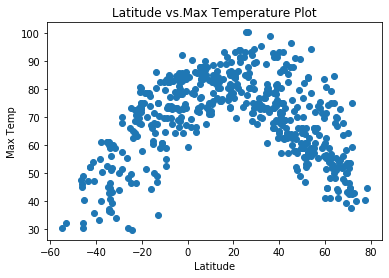

In [9]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs.Max Temperature Plot')
plt.savefig("Fig1.png")

#Based on the Plot, it appears that the temperature rises near the equator

## Latitude vs. Humidity Plot

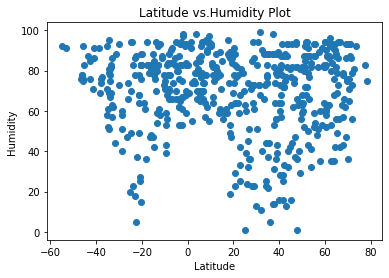

In [10]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs.Humidity Plot')
plt.savefig("Fig2.png")

#Based on the plot, theree seems to be not much correlation between latitude and humidity

## Latitude vs. Cloudiness Plot

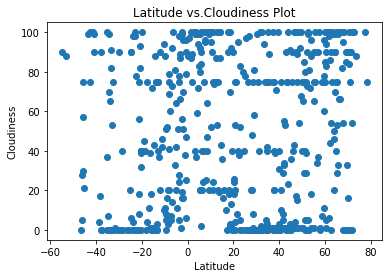

In [11]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs.Cloudiness Plot')
plt.savefig("Fig3.png")

#based on the plot there seems to be no correlation between latitude and cloudiness

## Latitude vs. Wind Speed Plot

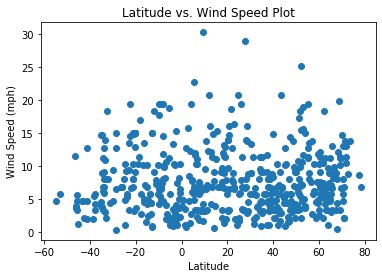

In [12]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed Plot')
plt.savefig("Fig4.png")

#based on the plot there seems to be not much correlation between latitude vs. wind speed

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_reg(x_values,y_values, x_name, y_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_equation = "y =" + str(round(slope,2)) +"x +" + str(round(intercept,2))
    print(f"The r-squared is: {rvalue**2}")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(f"{x_name}")
    plt.ylabel(f"{y_name}")
    plt.title(f"{x_name} vs. {y_name}" )
    return line_equation


In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = clean_city_data[clean_city_data["Latitude"]>0]
southern_df = clean_city_data[clean_city_data["Latitude"]<0]

northern_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
1,Yellowknife,90,CA,1594787136,93,62.46,-114.35,55.40,18.34
3,Los Llanos de Aridane,1,ES,1594787334,73,28.66,-17.92,71.60,13.87
5,San Patricio,40,MX,1594787335,86,19.22,-104.70,81.03,7.87
6,Örnsköldsvik,100,SE,1594787335,93,63.29,18.72,51.80,3.36
10,Harper,72,LR,1594787336,79,4.38,-7.72,73.33,7.83
...,...,...,...,...,...,...,...,...,...
532,Ganzhou,58,CN,1594787462,73,28.82,115.43,89.37,2.95
533,Wajima,75,JP,1594787463,88,37.40,136.90,73.40,9.17
535,Sørland,0,NO,1594787463,78,67.67,12.69,55.99,3.44
536,Bantry,75,IE,1594787463,87,51.68,-9.45,55.40,18.34


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.45432816289288713


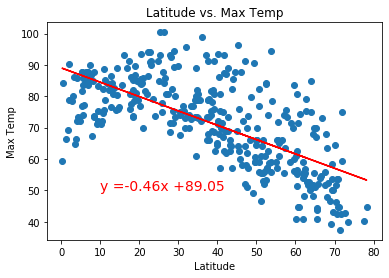

In [27]:
line = lin_reg(northern_df["Latitude"], northern_df["Max Temp"], "Latitude", "Max Temp")
plt.annotate(line,(10,50),fontsize=14,color="red");
plt.savefig("Fig5.png")

#There is correlation between latitude and max temperature in the northern hemisphere (linear)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5579065930192018


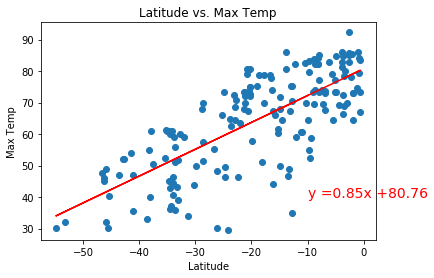

In [30]:
line = lin_reg(southern_df["Latitude"], southern_df["Max Temp"], "Latitude", "Max Temp")
plt.annotate(line,(-10,40),fontsize=14,color="red");

plt.savefig("Fig6.png")

#There is correlation between latitude and max temperature in the southern hemisphere (linear)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 2.7284468246661424e-05


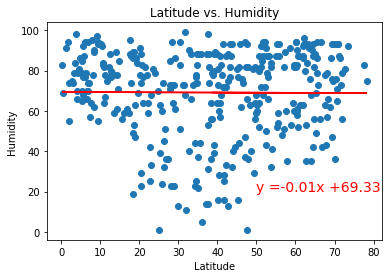

In [33]:
line = lin_reg(northern_df["Latitude"], northern_df["Humidity"], "Latitude", "Humidity")
plt.annotate(line,(50,20),fontsize=14,color="red");

plt.savefig("Fig7.png")

#There seems to be no correlation between latitude and humidity in the northern hempispher

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 7.159576219029884e-05


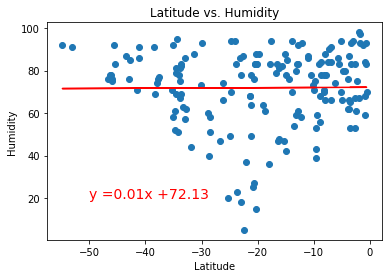

In [34]:
line = lin_reg(southern_df["Latitude"], southern_df["Humidity"], "Latitude", "Humidity")
plt.annotate(line,(-50,20),fontsize=14,color="red");

plt.savefig("Fig8.png")

#There seems to be no correlation between latitude and humidity in the southern hempispher

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.004409885811337332


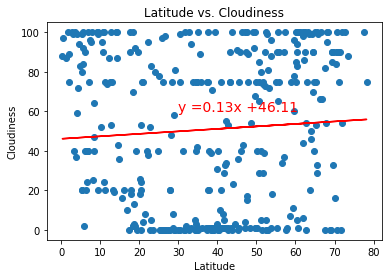

In [38]:
line = lin_reg(northern_df["Latitude"], northern_df["Cloudiness"], "Latitude", "Cloudiness")
plt.savefig("Fig9.png")
plt.annotate(line,(30,60),fontsize=14,color="red");

#There seems to be no correlation between latitude and cloudiness in the northern hempispher


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0033726714278216503


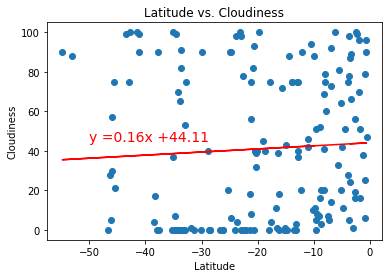

In [41]:
line = lin_reg(southern_df["Latitude"], southern_df["Cloudiness"], "Latitude", "Cloudiness")
plt.savefig("Fig10.png")
plt.annotate(line,(-50,45),fontsize=14,color="red");

#There seems to be no correlation between latitude and cloudiness in the southern hempispher


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 3.438921834809742e-06


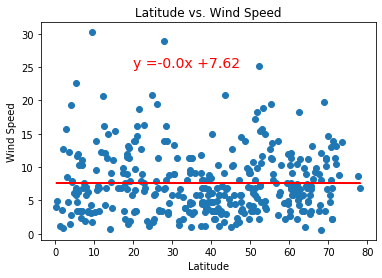

In [46]:
line = lin_reg(northern_df["Latitude"], northern_df["Wind Speed"], "Latitude", "Wind Speed")
plt.savefig("Fig11.png")
plt.annotate(line,(20,25),fontsize=14,color="red");

#There seems to be no correlation between latitude and wind speed in the northern hempispher


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
lin_reg(southern_df["Latitude"], southern_df["Wind Speed"], "Latitude", "Wind Speed")
plt.savefig("Fig12.png")

#There seems to be no correlation between latitude and wind speed in the southern hempispher
